# Data Generation

In [75]:
!pip install pulp

In [76]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import math

In [77]:
df = pd.read_csv("city_coordinates.csv")

In [78]:
df

,City,Latitude,Longitude
0,"Indira Gandhi International Airport ,Delhi",28.555168,77.084737
1,"Taj Mahal, Agra",27.175007,78.042101
2,"Taj Hotel,Maharashtra",18.921778,72.833285
3,"Agra Fort, UP",27.179826,78.020822
4,"Red Fort, Delhi",28.656081,77.240796
5,"Hawa Mahal, Jaipur",26.923932,75.826865
6,"Amer Fort, Jaipur",26.985475,75.853973
7,"Stok Kangri, Ladakh",33.986291,77.442149
8,"Nubra Valley, Ladakh",33.983834,77.817666
9,"Nohkalikai Falls, Cherrapunji",25.277734,91.729242


In [79]:
df.isnull().sum()

City         0
Latitude     0
Longitude    0
dtype: int64

In [80]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    d_lat = lat2 - lat1
    d_lon = lon2 - lon1
    a = math.sin(d_lat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(d_lon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c  # Earth's radius in kilometers

    return distance

# Sample DataFrame with latitude and longitude columns
# Replace this DataFrame with your own data
city_df = df

# Calculate distance matrix using Haversine formula
distance_matrix = {}
for i, row1 in city_df.iterrows():
    distance_matrix[row1['City']] = {}
    for j, row2 in city_df.iterrows():
        distance_matrix[row1['City']][row2['City']] = haversine_distance(row1['Latitude'], row1['Longitude'],
                                                                         row2['Latitude'], row2['Longitude'])

# Convert the distance matrix to a DataFrame
df_distance = pd.DataFrame.from_dict(distance_matrix, orient='index')

# Print the distance matrix
print(df_distance)


                                            Indira Gandhi International Airport ,Delhi  \
Indira Gandhi International Airport ,Delhi                                    0.000000   
Taj Mahal, Agra                                                             180.022403   
Taj Hotel,Maharashtra                                                      1154.984644   
Agra Fort, UP                                                               178.477545   
Red Fort, Delhi                                                              18.921140   
Hawa Mahal, Jaipur                                                          219.598605   
Amer Fort, Jaipur                                                           212.429656   
Stok Kangri, Ladakh                                                         604.866428   
Nubra Valley, Ladakh                                                        607.639784   
Nohkalikai Falls, Cherrapunji                                              1495.892174   
Nanda Devi

In [81]:
distance=df_distance.T

In [82]:
# A handful of sites
sites=[
    'Indira Gandhi International Airport ,Delhi',
    'Taj Mahal, Agra',
    'Taj Hotel,Maharashtra',
     'Agra Fort, UP',
    'Red Fort, Delhi',
    'Hawa Mahal, Jaipur ',
    'Amer Fort, Jaipur',
    'Stok Kangri, Ladakh',
    'Nubra Valley, Ladakh',
    'Nohkalikai Falls, Cherrapunji',
    'Nanda Devi, Uttarakhand',
    'Kargil',
    'Andaman And Nicobar Islands',
    'Khajjiar, Himachal Pradesh',
    'Himachal Pradesh',
    'Dal Lake',
    'Valley Of Flowers, Uttaranchal',
    'Pangong Tso, Leh Ladakh',
    'Ghats, Varanasi',
    'Sand Dunes, Jaisalmer',
    'Lake Pichola, Udaipur',
    'Dudhsagar Falls, Goa',
    'Agatti Island, Lakshadweep',
    'Munnar, Kerala',
    'Manali',
    'Raigad',
    'Ladakh',
    'Tawang, Arunachal Pradesh',
    'Uttrakhand',
    'Chilka Lake, Odisha',
    'Agumbe, Karnataka',
    'Rann Of Kutch',
    'Loktak Lake, Manipur',
    'Caves, Meghalaya',
    'Palolem Beach, Goa',
    'Tamil Nadu',
    'Bhedaghat, Madhya Pradesh',
    'Lonar Crater, Maharashtra',
    'Gulmarg, Jammu And Kashmir',
    'Andhra Pradesh',
    'Karnataka',
    'Maharashtra',
    'Chembra Peak, Wayanad, Kerala',
    'Lonavala',
    'Mumbai, Maharashtra',
    'Jaipur, Rajasthan',
    'Mahabaleshwar',
    'Ooty'
]
pos = ['Latitude', 'Longitude']
position = pd.read_csv('city_coordinates.csv', index_col="City")
#flighttime = pd.read_csv('flight_time.csv', index_col="City")
distance.head(5)
position.head(5)

,Latitude,Longitude
City,,
"Indira Gandhi International Airport ,Delhi",28.555168,77.084737
"Taj Mahal, Agra",27.175007,78.042101
"Taj Hotel,Maharashtra",18.921778,72.833285
"Agra Fort, UP",27.179826,78.020822
"Red Fort, Delhi",28.656081,77.240796


In [83]:
distance.head(5)

,"Indira Gandhi International Airport ,Delhi","Taj Mahal, Agra","Taj Hotel,Maharashtra","Agra Fort, UP","Red Fort, Delhi","Hawa Mahal, Jaipur","Amer Fort, Jaipur","Stok Kangri, Ladakh","Nubra Valley, Ladakh","Nohkalikai Falls, Cherrapunji",...,"Gulmarg, Jammu And Kashmir",Andhra Pradesh,Karnataka,Maharashtra,"Chembra Peak, Wayanad, Kerala",Lonavala,"Mumbai, Maharashtra","Jaipur, Rajasthan",Mahabaleshwar,Ooty
"Indira Gandhi International Airport ,Delhi",0.000000,180.022403,1154.984644,178.477545,18.921140,219.598605,212.429656,604.866428,607.639784,1495.892174,...,662.204488,1440.116930,1566.898373,1082.375917,1897.903188,1152.265502,1136.390449,220.816967,1237.214141,1907.580021
"Taj Mahal, Agra",180.022403,0.000000,1060.878009,2.172005,182.538605,221.144980,217.654607,759.549419,757.410991,1380.732141,...,840.195192,1270.456871,1427.508524,950.687779,1753.519997,1049.613688,1042.635920,222.048178,1127.526944,1759.317929
"Taj Hotel,Maharashtra",1154.984644,1060.878009,0.000000,1060.247831,1171.293458,941.008918,948.357106,1736.181277,1746.067119,2068.491624,...,1689.134002,848.192994,578.032682,298.835382,894.805476,62.629837,18.632885,939.859013,140.854430,932.947032
"Agra Fort, UP",178.477545,2.172005,1060.247831,0.000000,181.160370,219.119079,215.606408,758.864034,756.820471,1382.879880,...,838.861675,1271.367723,1427.666505,950.653933,1753.794616,1049.106509,1041.998243,220.025219,1127.137395,1759.675447
"Red Fort, Delhi",18.921140,182.538605,1171.293458,181.160370,0.000000,237.570583,230.446466,593.000388,594.944171,1483.074282,...,657.761015,1447.608924,1579.580190,1095.680069,1910.051896,1168.031075,1152.709935,238.791645,1252.528983,1919.208170


In [84]:
# Categories of places
place_categories = {
    'Historical Places': ['Taj Mahal, Agra', 'Taj Hotel,Maharashtra', 'Agra Fort, UP', 'Red Fort, Delhi', 'Hawa Mahal, Jaipur ', 'Amer Fort, Jaipur',],
    'Natural Landmarks': ['Stok Kangri, Ladakh',
    'Nubra Valley, Ladakh',
    'Nohkalikai Falls, Cherrapunji', 'Caves, Meghalaya',
    'Nanda Devi, Uttarakhand',
    'Khajjiar, Himachal Pradesh',
    'Himachal Pradesh',
    'Valley Of Flowers, Uttaranchal',
    'Pangong Tso, Leh Ladakh',
    'Ghats, Varanasi',
    'Sand Dunes, Jaisalmer'],
    'Cities and Urban Exploration': ['Kargil', 'Manali','Mumbai, Maharashtra',
    'Jaipur, Rajasthan',
    'Raigad','Lonar Crater, Maharashtra',],
    'Beach Destinations': [ 'Andaman And Nicobar Islands', 'Mahabaleshwar',
    'Ooty'
    'Dal Lake','Bhedaghat, Madhya Pradesh',
    'Lake Pichola, Udaipur',
    'Dudhsagar Falls, Goa',
    'Palolem Beach, Goa',
    'Agatti Island, Lakshadweep','Chilka Lake, Odisha',
    'Agumbe, Karnataka',
    'Rann Of Kutch',
    'Loktak Lake, Manipur','Lonavala','Chembra Peak, Wayanad, Kerala',],
    'Cultural Experiences': ['Munnar, Kerala',
    'Tawang, Arunachal Pradesh',
    'Uttrakhand', 'Tamil Nadu','Andhra Pradesh',
    'Karnataka','Gulmarg, Jammu And Kashmir']
}

Historical Places:
1. Taj Mahal, Agra
2. Taj Hotel,Maharashtra
3. Agra Fort, UP
4. Red Fort, Delhi
5. Hawa Mahal, Jaipur 
6. Amer Fort, Jaipur
Enter the number of the place you are interested in (0 to finish): 1
Enter the number of the place you are interested in (0 to finish): 5
Enter the number of the place you are interested in (0 to finish): 6
Enter the number of the place you are interested in (0 to finish): 0
Natural Landmarks:
1. Stok Kangri, Ladakh
2. Nubra Valley, Ladakh
3. Nohkalikai Falls, Cherrapunji
4. Caves, Meghalaya
5. Nanda Devi, Uttarakhand
6. Khajjiar, Himachal Pradesh
7. Himachal Pradesh
8. Valley Of Flowers, Uttaranchal
9. Pangong Tso, Leh Ladakh
10. Ghats, Varanasi
11. Sand Dunes, Jaisalmer
Enter the number of the place you are interested in (0 to finish): 1
Enter the number of the place you are interested in (0 to finish): 2
Enter the number of the place you are interested in (0 to finish): 9
Enter the number of the place you are interested in (0 to finish): 0
Ci

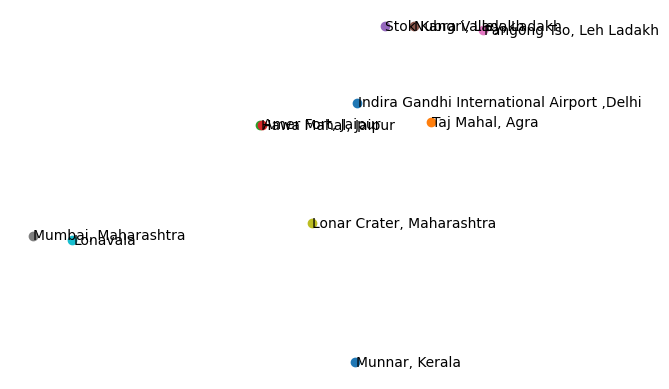

In [85]:
def get_places_for_category(category):
    selected_places = []
    print(f"{category}:")
    for i, place in enumerate(place_categories[category]):
        print(f"{i + 1}. {place}")
    while True:
        selected_place_index = int(input("Enter the number of the place you are interested in (0 to finish): "))
        if selected_place_index == 0:
            break
        selected_places.append(place_categories[category][selected_place_index - 1])
    return selected_places

# User input: Choose the type of places they are interested in
selected_places = ['Indira Gandhi International Airport ,Delhi']
for category in place_categories:
    selected_places.extend(get_places_for_category(category))

print("Selected places of interest:", selected_places)

 #Make some positions (so we can plot this)
positions = dict((city, (position.loc[city, 'Longitude'], position.loc[city, 'Latitude'])) for city in selected_places)
for s in positions:
    p = positions[s]
    plt.plot(p[0], p[1], 'o')
    plt.text(p[0] + .01, p[1], s, horizontalalignment='left', verticalalignment='center')

plt.gca().axis('off');

# Get distance between selected cities
distances = dict(((s1, s2), distance.loc[s1, s2]) for s1 in selected_places for s2 in selected_places if s1 != s2)
K = 1  # Number of tourists

# Create the problem
prob = LpProblem("vehicle", LpMinimize)

# Indicator variable if site i is connected to site j in the tour
x = LpVariable.dicts('x', distances, 0, 1, LpBinary)

# Dummy vars to eliminate subtours
u = LpVariable.dicts('u', selected_places, 0, len(selected_places) - 1, LpInteger)

# The objective
cost = lpSum([x[(i, j)] * distances[(i, j)] for (i, j) in distances])
prob += cost

# Constraints
for k in selected_places:
    cap = 1 if k != 'Indira Gandhi International Airport ,Delhi' else K
    # Inbound connection
    prob += lpSum([x[(i, k)] for i in selected_places if (i, k) in x]) == cap
    # Outbound connection
    prob += lpSum([x[(k, i)] for i in selected_places if (k, i) in x]) == cap

# Subtour elimination
N = len(selected_places) / K
for i in selected_places:
    for j in selected_places:
        if i != j and (i != 'Indira Gandhi International Airport ,Delhi' and j != 'Indira Gandhi International Airport ,Delhi') and (i, j) in x:
            prob += u[i] - u[j] <= (N) * (1 - x[(i, j)]) - 1

%time prob.solve()
# prob.solve(GLPK_CMD(options=['--simplex']))
print(LpStatus[prob.status])

non_zero_edges = [e for e in x if value(x[e]) != 0]


def get_next_site(parent):
    '''helper function to get the next edge'''
    edges = [e for e in non_zero_edges if e[0] == parent]
    for e in edges:
        non_zero_edges.remove(e)
    return edges


tours = get_next_site('Indira Gandhi International Airport ,Delhi')
tours = [[e] for e in tours]

for t in tours:
    while t[-1][1] != 'Indira Gandhi International Airport ,Delhi':
        t.append(get_next_site(t[-1][1])[-1])

print("Personalized routes for tourists:")
for t in tours:
    print(' -> '.join([a for a, b in t] + ['Indira Gandhi International Airport ,Delhi']))


Personalized routes for tourists:
Indira Gandhi International Airport ,Delhi -> Stok Kangri, Ladakh -> Nubra Valley, Ladakh -> Pangong Tso, Leh Ladakh -> Taj Mahal, Agra -> Lonar Crater, Maharashtra -> Munnar, Kerala -> Lonavala -> Mumbai, Maharashtra -> Hawa Mahal, Jaipur  -> Amer Fort, Jaipur -> Indira Gandhi International Airport ,Delhi


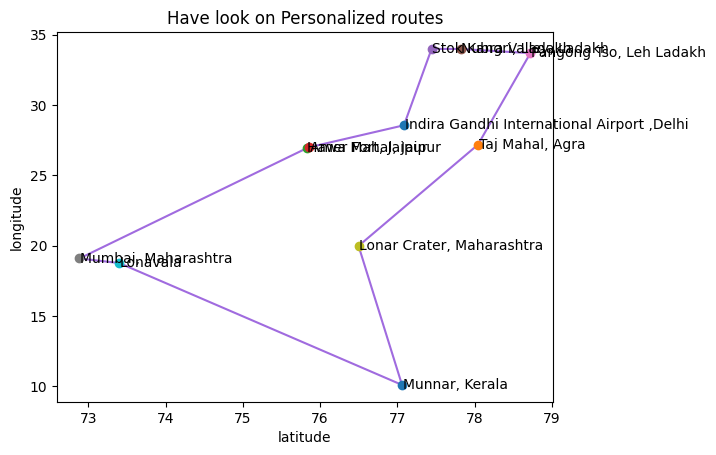

Total distance: 5621.528204206291 (km)


In [90]:
print("Personalized routes for tourists:")
for t in tours:
    print(' -> '.join([a for a, b in t] + ['Indira Gandhi International Airport ,Delhi']))
#draw the tours
colors = [np.random.rand(3) for i in range(len(tours))]
for t,c in zip(tours,colors):
    for a,b in t:
        p1,p2 = positions[a], positions[b]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]], color=c)

#draw the map again
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')

plt.title('%d '%K + 'people' if K > 1 else 'Have look on Personalized routes')
plt.xlabel('latitude')
plt.ylabel('longitude')
# plt.gca().axis('off')
plt.show()
print('Total distance:', value(prob.objective), '(km)')
